In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

88150.94999999998


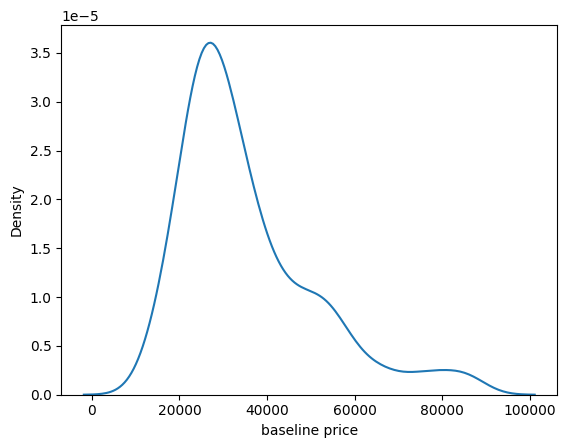

In [14]:
df = pd.read_csv("data/cars_env.csv")
df.head()

# Drop extremely expensive cars:
q90 = np.quantile( df['baseline price'],.9) # Compute the .9 quantile
print(q90)
keep = df['baseline price'] < q90  # Logical condition asserting price < .9 quantile
df = df.loc[keep,:] # Use locator function to filter on a Boolean conditional
df.describe()
sns.kdeplot(data=df,x='baseline price')

# Simplify the vehicle classification scheme:
df['class'] = df['EPA class']
df['class'] = df['class'].replace(['MIDSIZE CARS','COMPACT CARS','SUBCOMPACT CARS','TWO SEATERS','LARGE CARS'],'car')
df['class'] = df['class'].replace(['SMALL STATION WAGONS','MIDSIZE STATION WAGONS'],'station wagon')
df['class'] = df['class'].replace(['STANDARD PICKUP TRUCKS','SMALL PICKUP TRUCKS'],'truck')
df['class'] = df['class'].replace(['VANS','MINIVAN'],'van')

In [15]:
! pwd

/sfs/weka/scratch/qtr7bs/bsds_class/scratchpad


baseline price                                            \
                       count          mean           std           min   
class                                                                    
SUV                    156.0  36276.038126  13265.630531  17913.329655   
car                    204.0  39021.420695  18857.153237  11783.040000   
station wagon           20.0  29476.437707  11321.733049  15549.900000   
truck                   71.0  26922.926268   4607.697988  16203.698951   
van                     20.0  27778.296419   3076.716822  21377.160000   

                                                                       
                        25%           50%           75%           max  
class                                                                  
SUV            25774.364884  32711.075180  43136.206482  84377.468696  
car            24223.980000  35267.658110  51016.575000  87490.500000  
station wagon  17602.650000  30156.575074  35414.575625  55870.500000  
truck          23909.662556  26394.033673  30116.107816  37840.535000  
van            25896.296891  28096.389352  29447.920444  34353.600000

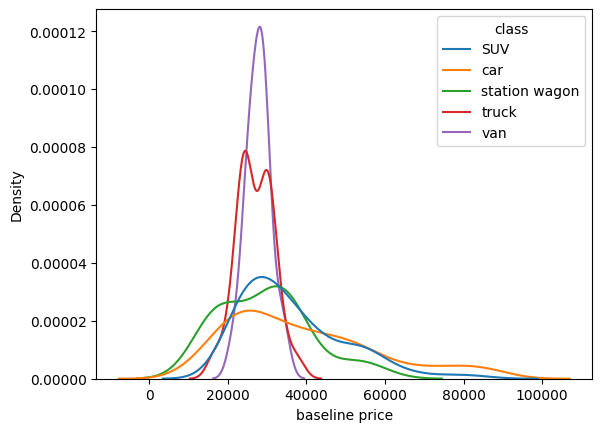

In [19]:
sns.kdeplot(x=df['baseline price'], hue = df['class'], common_norm=False)
df.loc[:,['baseline price','class']].groupby('class').describe() # Baseline price by simplified vehicle class

footprint                                              \
                  count       mean        std        min        25%   
class                                                                 
SUV               156.0  49.198370   4.809056  41.008750  45.490313   
car               204.0  45.179790   3.740554  36.692097  42.900000   
station wagon      20.0  43.964019   2.900430  39.500000  42.197207   
truck              71.0  60.898435  10.104335  45.698300  54.485956   
van                20.0  60.163344   5.470372  45.300000  54.860885   

                                                
                     50%        75%        max  
class                                           
SUV            48.570469  51.300000  61.000000  
car            45.106705  47.633006  53.825797  
station wagon  43.310406  45.168965  49.420204  
truck          61.700000  67.400000  77.500000  
van            63.500000  63.562500  65.200000

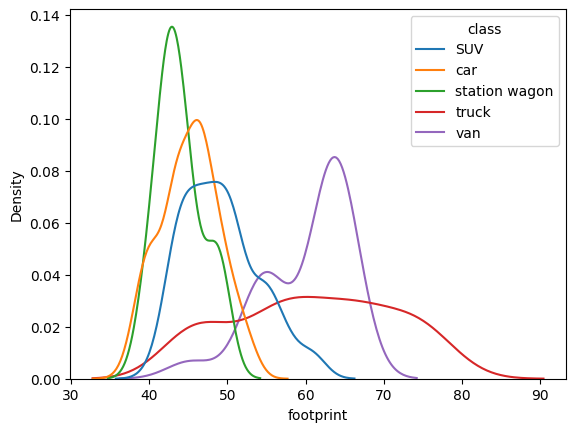

In [20]:
sns.kdeplot(x=df['footprint'], hue = df['class'], common_norm=False)
df.loc[:,['footprint','class']].groupby('class').describe() # Footprint by simplified vehicle class

In [21]:
# car is most efficient, followed by station wagon. Truck if most polluting. 

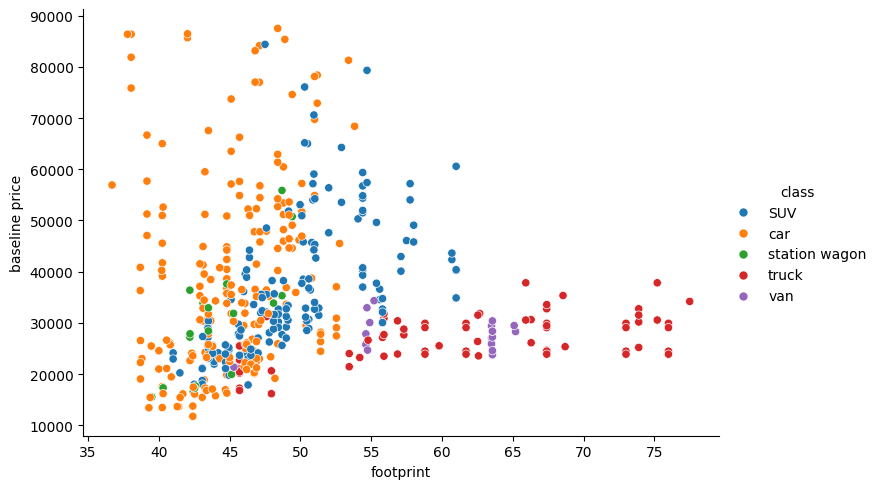

In [26]:
sns.relplot(df, x = "footprint", y = "baseline price", hue = "class", kind = "scatter", aspect = 1.5)

#### Classfication vs Regression 
if target variable is categorical --> classification \
if target variable is numerical --> regression 

#### Scaling/normalization 
makes everything scale from 0-1

u = (x-min)/(max-min)

In [31]:
# not normalized
y = df["class"]
x = df.loc[:, ["footprint", "baseline price"]]
x.head()

,footprint,baseline price
0,50.8,45706.20000
1,45.1,34588.20000
2,47.6,47934.90000
3,47.8,35217.81622
4,46.0,29483.10000


In [35]:
# normalized
def maxmin(x):
    u = (x - min(x))/(max(x)-min(x))
    return u

u = x.apply(maxmin)
u.head()

,footprint,baseline price
0,0.345715,0.448082
1,0.206036,0.301227
2,0.267299,0.477520
3,0.272200,0.309544
4,0.228091,0.233795


In [37]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5) # create model instance
model = model.fit(u,y) # train model 
y_hat = model.predict(u)

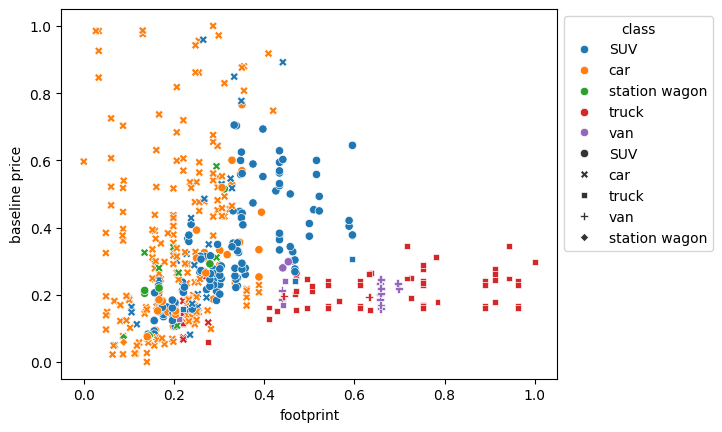

In [40]:
this_plot = sns.scatterplot(x=u["footprint"],y=u["baseline price"], hue = y, style=y_hat)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

In [41]:
df_1 = pd.read_csv("data/land_mines.csv")
df_1

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [56]:
# not normalized
y1 = df_1["mine_type"]
x1 = df_1.loc[:, ["voltage", "height"]]
x1.head()

,voltage,height
0,0.338157,0.000000
1,0.320241,0.181818
2,0.287009,0.272727
3,0.256284,0.454545
4,0.262840,0.545455


In [57]:
v = x1.apply(maxmin)
v.head()

,voltage,height
0,0.175033,0.000000
1,0.152702,0.181818
2,0.111279,0.272727
3,0.072981,0.454545
4,0.081152,0.545455


In [58]:
model = KNeighborsClassifier(n_neighbors = 5) # create model instance
model = model.fit(v,y1) # train model 
y1_hat = model.predict(v)

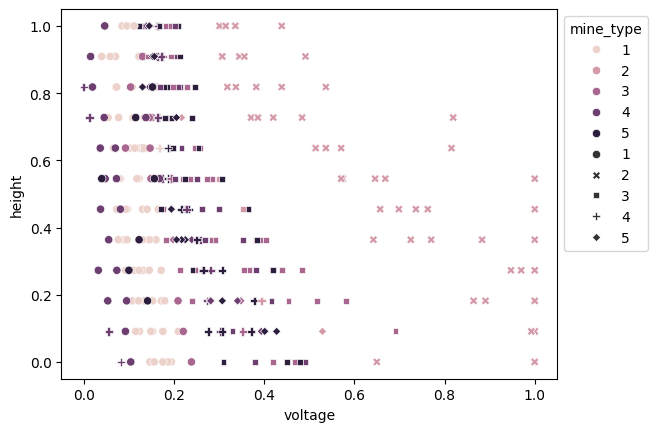

In [60]:
that_plot = sns.scatterplot(x=v["voltage"],y=v["height"], hue = y1, style=y1_hat)
sns.move_legend(that_plot, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='voltage', ylabel='Density'>

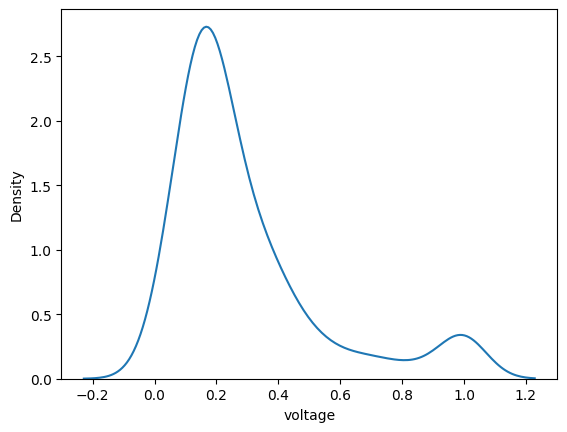

In [67]:
sns.kdeplot(data = v, x = "voltage")

KeyError: "None of [Index(['voltage', 'mine_type'], dtype='object')] are in the [columns]"

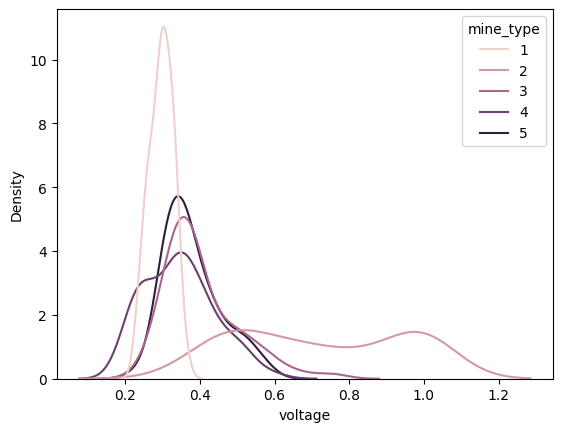

In [72]:
sns.kdeplot(x=df_1['voltage'], hue = df_1['mine_type'], common_norm=False)
df.loc[:,['voltage','mine_type']].groupby('class').describe() # Footprint by simplified vehicle class